##### Copyright 2018 The TensorFlow Authors.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import numpy as np
import pandas as pd
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.advanced_activations import LeakyReLU
import numpy as np
import keras.backend as kb
import tensorflow as tf
from matplotlib import image
from matplotlib import pyplot
from PIL import Image
from PIL import ImageOps

In [ ]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [ ]:
keras.__version__

'2.7.0'

In [ ]:
imgall=np.zeros([131,650,650,1])
y=np.zeros([131,1])
labels=np.zeros([131,1])
a=0
for i in range(7):
    imgall[a,:,:,:]=np.array(Image.open('3_{}.jpg'.format(str(i)))).reshape(650,650,1)
    y[a,0]=3
    labels[a]=2
    a+=1
for i in range(4):
    imgall[a,:,:,:]=np.array(Image.open('3_{}_2.jpg'.format(str(i)))).reshape(650,650,1)
    y[a,0]=3
    labels[a]=1
    a+=1
for i in range(6):
    imgall[a,:,:,:]=np.array(Image.open('6_{}.jpg'.format(str(i)))).reshape(650,650,1)
    y[a,0]=6
    labels[a]=2
    a+=1
for i in range(4):
    imgall[a,:,:,:]=np.array(Image.open('6_{}_2.jpg'.format(str(i)))).reshape(650,650,1)
    y[a,0]=6
    labels[a]=1
    a+=1
for i in range(7):
    imgall[a,:,:,:]=np.array(Image.open('10_{}.jpg'.format(str(i)))).reshape(650,650,1)
    y[a,0]=10
    labels[a]=2
    a+=1
for i in range(3):
    imgall[a,:,:,:]=np.array(Image.open('10_{}_2.jpg'.format(str(i)))).reshape(650,650,1)
    y[a,0]=10
    labels[a]=1
    a+=1
for i in range(7):
    imgall[a,:,:,:]=np.array(Image.open('15_{}.jpg'.format(str(i)))).reshape(650,650,1)
    y[a,0]=15
    labels[a]=2
    a+=1
for i in range(4):
    imgall[a,:,:,:]=np.array(Image.open('15_{}_2.jpg'.format(str(i)))).reshape(650,650,1)
    y[a,0]=15
    labels[a]=1
    a+=1
for i in range(5):
    imgall[a,:,:,:]=np.array(Image.open('20_{}.jpg'.format(str(i)))).reshape(650,650,1)
    y[a,0]=20
    labels[a]=2
    a+=1
for i in range(10):
    imgall[a,:,:,:]=np.array(Image.open('20_{}_2.jpg'.format(str(i)))).reshape(650,650,1)
    y[a,0]=20
    labels[a]=1
    a+=1
for i in range(6):
    imgall[a,:,:,:]=np.array(Image.open('25_{}.jpg'.format(str(i)))).reshape(650,650,1)
    y[a,0]=25
    labels[a]=2
    a+=1
for i in range(2):
    imgall[a,:,:,:]=np.array(Image.open('25_{}_2.jpg'.format(str(i)))).reshape(650,650,1)
    y[a,0]=25
    labels[a]=1
    a+=1
for i in range(8):
    imgall[a,:,:,:]=np.array(Image.open('30_{}.jpg'.format(str(i)))).reshape(650,650,1)
    y[a,0]=30
    labels[a]=2
    a+=1
for i in range(6):
    imgall[a,:,:,:]=np.array(Image.open('30_{}_2.jpg'.format(str(i)))).reshape(650,650,1)
    y[a,0]=30
    labels[a]=1
    a+=1
for i in range(7):
    imgall[a,:,:,:]=np.array(Image.open('35_{}.jpg'.format(str(i)))).reshape(650,650,1)
    y[a,0]=35
    labels[a]=2
    a+=1
for i in range(9):
    imgall[a,:,:,:]=np.array(Image.open('35_{}_2.jpg'.format(str(i)))).reshape(650,650,1)
    y[a,0]=35
    labels[a]=1
    a+=1
for i in range(6):
    imgall[a,:,:,:]=np.array(Image.open('40_{}.jpg'.format(str(i)))).reshape(650,650,1)
    y[a,0]=40
    labels[a]=2
    a+=1
for i in range(6):
    imgall[a,:,:,:]=np.array(Image.open('40_{}_2.jpg'.format(str(i)))).reshape(650,650,1)
    y[a,0]=40
    labels[a]=1
    a+=1
for i in range(7):
    imgall[a,:,:,:]=np.array(Image.open('45_{}.jpg'.format(str(i)))).reshape(650,650,1)
    y[a,0]=45
    labels[a]=2
    a+=1
for i in range(6):
    imgall[a,:,:,:]=np.array(Image.open('45_{}_2.jpg'.format(str(i)))).reshape(650,650,1)
    y[a,0]=45
    labels[a]=1
    a+=1
for i in range(6):
    imgall[a,:,:,:]=np.array(Image.open('50_{}.jpg'.format(str(i)))).reshape(650,650,1)
    y[a,0]=50
    labels[a]=2
    a+=1
for i in range(5):
    imgall[a,:,:,:]=np.array(Image.open('50_{}_2.jpg'.format(str(i)))).reshape(650,650,1)
    y[a,0]=50
    labels[a]=1
    a+=1
imgall=imgall.astype('float32')/255
ymed=np.median(y)
y=y/ymed
y

array([[0.1       ],
       [0.1       ],
       [0.1       ],
       [0.1       ],
       [0.1       ],
       [0.1       ],
       [0.1       ],
       [0.1       ],
       [0.1       ],
       [0.1       ],
       [0.1       ],
       [0.2       ],
       [0.2       ],
       [0.2       ],
       [0.2       ],
       [0.2       ],
       [0.2       ],
       [0.2       ],
       [0.2       ],
       [0.2       ],
       [0.2       ],
       [0.33333333],
       [0.33333333],
       [0.33333333],
       [0.33333333],
       [0.33333333],
       [0.33333333],
       [0.33333333],
       [0.33333333],
       [0.33333333],
       [0.33333333],
       [0.5       ],
       [0.5       ],
       [0.5       ],
       [0.5       ],
       [0.5       ],
       [0.5       ],
       [0.5       ],
       [0.5       ],
       [0.5       ],
       [0.5       ],
       [0.5       ],
       [0.66666667],
       [0.66666667],
       [0.66666667],
       [0.66666667],
       [0.66666667],
       [0.666

In [ ]:
import random
randomlist = random.sample(range(0, 131), int(131*.2))
imgtest=imgall[randomlist,:,:]
ytest=y[randomlist,:]
labelstest=labels[randomlist,:]
main_list = list(set(range(0,131)) - set(randomlist))
imgtrain=imgall[main_list,:,:]
ytrain=y[main_list,:]
labelstrain=labels[main_list,:]

In [ ]:
model = Sequential()
model.add(Conv2D(128, kernel_size=(3, 3),activation='linear',input_shape=(650,650,1),padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2),padding='same'))
model.add(Conv2D(256, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Conv2D(25, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(1))
model.compile(loss='mean_absolute_error', optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 650, 650, 128)     1280      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 650, 650, 128)     0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 325, 325, 128)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 325, 325, 256)     295168    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 325, 325, 256)     0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 163, 163, 256)    0         
 2D)                                                    

In [ ]:
batch_size = 8
epochs = 100
num_classes=1

In [ ]:
import timeit

In [ ]:
train = model.fit(imgtrain, ytrain, batch_size=batch_size,epochs=epochs,verbose=1)

Epoch 1/100
14/14 [==============================] - 33s 1s/step - loss: 8.7926 - accuracy: 0.0476
Epoch 2/100
14/14 [==============================] - 17s 1s/step - loss: 0.5958 - accuracy: 0.0952
Epoch 3/100
14/14 [==============================] - 17s 1s/step - loss: 0.3255 - accuracy: 0.1238
Epoch 4/100
14/14 [==============================] - 17s 1s/step - loss: 0.2213 - accuracy: 0.1238
Epoch 5/100
14/14 [==============================] - 17s 1s/step - loss: 0.2357 - accuracy: 0.1238
Epoch 6/100
14/14 [==============================] - 17s 1s/step - loss: 0.2566 - accuracy: 0.1238
Epoch 7/100
14/14 [==============================] - 17s 1s/step - loss: 0.3548 - accuracy: 0.1143
Epoch 8/100
14/14 [==============================] - 17s 1s/step - loss: 0.2345 - accuracy: 0.1238
Epoch 9/100
14/14 [==============================] - 17s 1s/step - loss: 0.5069 - accuracy: 0.1238
Epoch 10/100
14/14 [==============================] - 17s 1s/step - loss: 2.7150 - accuracy: 0.0857
Epoch 11/

In [ ]:
model.save('Complete_Distance')

INFO:tensorflow:Assets written to: Complete_Distance/assets


In [ ]:
!zip -r Full_Distance.zip Complete_Distance

  adding: Complete_Distance/ (stored 0%)
  adding: Complete_Distance/variables/ (stored 0%)
  adding: Complete_Distance/variables/variables.data-00000-of-00001 (deflated 6%)
  adding: Complete_Distance/variables/variables.index (deflated 66%)
  adding: Complete_Distance/keras_metadata.pb (deflated 92%)
  adding: Complete_Distance/saved_model.pb (deflated 89%)
  adding: Complete_Distance/assets/ (stored 0%)


In [ ]:
from google.colab import files
files.download("Full_Distance.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
ypred1=model.predict(imgtrain[:int(imgtrain.shape[0]/2),:,:])*ymed
ypred2=model.predict(imgtrain[int(imgtrain.shape[0]/2):,:,:])*ymed

In [ ]:
ypredtot=np.vstack([ypred1,ypred2])
np.hstack([ypredtot,ytrain*ymed,labelstrain])

array([[ 3.49704933,  3.        ,  2.        ],
       [ 4.76100588,  3.        ,  2.        ],
       [ 5.2924161 ,  3.        ,  2.        ],
       [15.76280975,  3.        ,  2.        ],
       [ 5.76023102,  3.        ,  2.        ],
       [ 4.2668376 ,  3.        ,  1.        ],
       [ 3.81645894,  3.        ,  1.        ],
       [ 5.57420826,  3.        ,  1.        ],
       [ 3.61435032,  3.        ,  1.        ],
       [ 7.56032753,  6.        ,  2.        ],
       [ 7.50712776,  6.        ,  2.        ],
       [11.69629669,  6.        ,  2.        ],
       [ 8.18275928,  6.        ,  2.        ],
       [ 7.47366238,  6.        ,  1.        ],
       [ 5.47527218,  6.        ,  1.        ],
       [10.18668079,  6.        ,  1.        ],
       [ 8.4842701 ,  6.        ,  1.        ],
       [12.21251774, 10.        ,  2.        ],
       [ 8.58827877, 10.        ,  2.        ],
       [12.28644943, 10.        ,  2.        ],
       [11.6985817 , 10.        ,  2.   

1.3308649494534448
0.04436216498178149


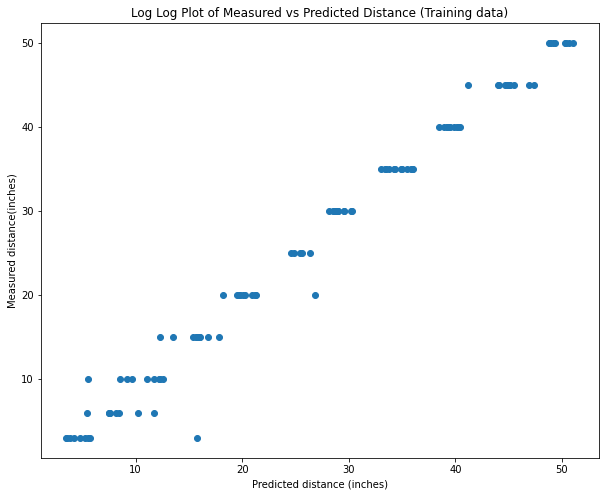

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 8]
fig = plt.figure()
plt.scatter(ypredtot,ytrain*ymed)
#plt.xscale('log')
#plt.yscale('log')
#plt.xlim(25,50)
#plt.ylim(25,50)
plt.xlabel('Predicted distance (inches)');
plt.ylabel('Measured distance(inches)');
plt.title('Log Log Plot of Measured vs Predicted Distance (Training data)');
plt.savefig('DistanceTrain.png')
print(np.mean(np.abs(ypredtot-ytrain*ymed)))
print(np.mean(np.abs(ypredtot-ytrain*ymed))/ymtrain)
plt.show()

1.0823016991982093
0.036076723306606974


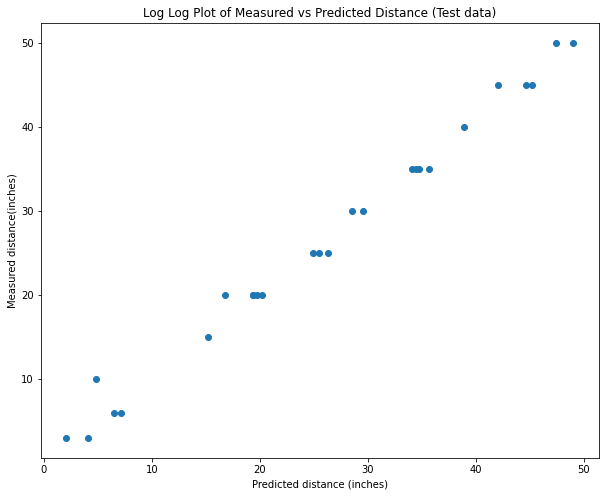

In [ ]:
ypred=model.predict(imgtest)*ymed
fig = plt.figure()
plt.scatter(ypred,ytest*ymed)
#plt.xscale('log')
#plt.yscale('log')
#plt.xlim(25,50)
#plt.ylim(25,50)
plt.xlabel('Predicted distance (inches)');
plt.ylabel('Measured distance(inches)');
plt.title('Log Log Plot of Measured vs Predicted Distance (Test data)');
plt.savefig('DistanceTest.png')
print(np.mean(np.abs(ypred-ytest*ymed)))
print(np.mean(np.abs(ypred-ytest*ymed))/ymed)
plt.show()

In [ ]:
np.sum(np.abs((ypred-ytest*ymed)/ypred.shape[0]))

1.0823016991982095

In [ ]:
model_drop = Sequential()
model_drop.add(Conv2D(128, kernel_size=(3, 3),activation='linear',input_shape=(650,650,1),padding='same'))
model_drop.add(LeakyReLU(alpha=0.1))
model_drop.add(MaxPooling2D((2, 2),padding='same'))
model_drop.add(Conv2D(256, (3, 3), activation='linear',padding='same'))
model_drop.add(LeakyReLU(alpha=0.1))
model_drop.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model_drop.add(Conv2D(25, (3, 3), activation='linear',padding='same'))
model_drop.add(LeakyReLU(alpha=0.1))                  
model_drop.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model_drop.add(Flatten())
model_drop.add(Dense(128, activation='linear'))
model_drop.add(LeakyReLU(alpha=0.1))
model_drop.add(Dropout(0.25))
model_drop.add(Dense(1))
model_drop.compile(loss='mean_absolute_error', optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])
model_drop.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 650, 650, 128)     1280      
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 650, 650, 128)     0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 325, 325, 128)    0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 325, 325, 256)     295168    
                                                                 
 leaky_re_lu_8 (LeakyReLU)   (None, 325, 325, 256)     0         
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 163, 163, 256)    0         
 2D)                                                  

In [ ]:
train_drop = model_drop.fit(imgtrain, ytrain, batch_size=batch_size,epochs=epochs,verbose=1)

Epoch 1/100
8/8 [==============================] - 10s 1s/step - loss: 13.2672 - accuracy: 0.0345
Epoch 2/100
8/8 [==============================] - 9s 1s/step - loss: 0.8726 - accuracy: 0.0517
Epoch 3/100
8/8 [==============================] - 10s 1s/step - loss: 0.9901 - accuracy: 0.1034
Epoch 4/100
8/8 [==============================] - 10s 1s/step - loss: 1.4188 - accuracy: 0.0345
Epoch 5/100
8/8 [==============================] - 10s 1s/step - loss: 1.3583 - accuracy: 0.1034
Epoch 6/100
8/8 [==============================] - 10s 1s/step - loss: 0.8532 - accuracy: 0.1034
Epoch 7/100
8/8 [==============================] - 10s 1s/step - loss: 0.7622 - accuracy: 0.0517
Epoch 8/100
8/8 [==============================] - 10s 1s/step - loss: 0.6099 - accuracy: 0.1034
Epoch 9/100
8/8 [==============================] - 10s 1s/step - loss: 0.5492 - accuracy: 0.1034
Epoch 10/100
8/8 [==============================] - 10s 1s/step - loss: 0.5078 - accuracy: 0.0862
Epoch 11/100
8/8 [===========

In [ ]:
ypred1=model_drop.predict(imgtrain[:int(imgtrain.shape[0]/2),:,:])*ymed
ypred2=model_drop.predict(imgtrain[int(imgtrain.shape[0]/2):,:,:])*ymed
ypredtot=np.vstack([ypred1,ypred2])
np.hstack([ypredtot,ytrain*ymed])

array([[ 3.73151374,  3.        ],
       [ 4.69713783,  3.        ],
       [ 6.416996  ,  3.        ],
       [ 4.24338675,  3.        ],
       [ 5.5077424 ,  3.        ],
       [ 6.13116121,  3.        ],
       [ 5.75116253,  3.        ],
       [ 6.65758991,  6.        ],
       [ 6.72940111,  6.        ],
       [ 8.26033783,  6.        ],
       [ 6.13777304,  6.        ],
       [ 9.17531967, 10.        ],
       [ 9.54322624, 10.        ],
       [ 9.30447006, 10.        ],
       [10.02996254, 10.        ],
       [ 9.6995697 , 10.        ],
       [ 8.87005138, 10.        ],
       [ 9.05239391, 10.        ],
       [14.1281929 , 15.        ],
       [13.62367821, 15.        ],
       [14.60446453, 15.        ],
       [14.23392773, 15.        ],
       [18.29679489, 20.        ],
       [18.03104782, 20.        ],
       [18.29008865, 20.        ],
       [23.73737907, 25.        ],
       [25.94176292, 25.        ],
       [23.5952549 , 25.        ],
       [24.61498833,

In [ ]:
np.sum(np.abs((ypredtot-ytrain*ymed)/ypredtot.shape[0]))

1.680331563127452

In [ ]:
ypred=model_drop.predict(imgtest)*ymed
np.hstack([ypred,ytest*ymed])

array([[ 7.52896214,  6.        ],
       [38.42802048, 45.        ],
       [11.2310648 , 15.        ],
       [47.10966492, 45.        ],
       [16.96430969, 20.        ],
       [18.27632332, 20.        ],
       [40.70408249, 40.        ],
       [36.79770279, 35.        ],
       [ 9.71201992, 15.        ],
       [53.30102539, 50.        ],
       [43.64939499, 45.        ],
       [30.93335915, 30.        ],
       [11.91085625, 15.        ],
       [14.01677704,  6.        ]])

In [ ]:
np.sum(np.abs((ypred-ytest*ymed)/ypred.shape[0]))

3.0871131760733466